# MNIST Practice (multi-class classification)

## Load Data

In [ ]:
from tensorflow.keras.datasets import mnist

(train_input, train_target), (test_input, test_target) = mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


''

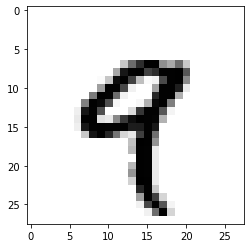

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_input[4], cmap=plt.cm.binary)
;

In [ ]:
train_target[4]

9

## Retype and Reshape Data

In [ ]:
train_input = train_input.astype('float32')
test_input = test_input.astype('float32')
train_target = train_target.astype('float32')
test_target = test_target.astype('float32')

train_input = train_input.reshape(-1, 28*28) / 255.0
test_input = test_input.reshape(-1, 28*28) / 255.0

print(train_input.shape)
print(test_input.shape)

(60000, 784)
(10000, 784)


## One Hot Encoding (Target Data)

In [ ]:
# 단순하게 6으로 표현되었던 것이, [0,0,0,0,0,0,1,0,0,0]로 표현되게 된다!

from tensorflow.keras.utils import to_categorical

train_target = to_categorical(train_target)
test_target = to_categorical(test_target)

print(train_target.shape)
print(test_target.shape)

print(train_target[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Define Models

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(28*28, )))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Compile and Fit Data

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    train_input,
    train_target,
    epochs=10,
    batch_size=128
)

Epoch 1/10
469/469 [==============================] - 4s 3ms/step - loss: 0.2564 - accuracy: 0.9267
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1037 - accuracy: 0.9692
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0693 - accuracy: 0.9797
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0501 - accuracy: 0.9845
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9888
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0288 - accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0218 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0168 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0134 - accuracy: 0.9961
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0099 - accuracy: 0.9972

## Evaluate Model

In [ ]:
import numpy as np

test_loss, test_acc = model.evaluate(test_input, test_target)

print('Loss:', np.round(test_loss, 4))
print('Accuracy:', np.round(test_acc, 4))

313/313 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9824
Loss: 0.0696
Accuracy: 0.9824


# IMDB Practice (binary classification)

## Data Loading

In [ ]:
import numpy as np
np.random.seed(1234)

In [ ]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(25000,) (25000,)
(25000,) (25000,)


In [ ]:
train_input[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_target[0]

1

In [ ]:
max([max(doc) for doc in train_input])

9999

## Create Token Dictionary

In [ ]:
WordIndex_dict = imdb.get_word_index()
WordIndex_dict

1646592/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
IndexWord_dict = dict([(v, k) for (k, v) in WordIndex_dict.items()])
WordIndex_dict = dict([(k, v) for (k, v) in WordIndex_dict.items()])

In [ ]:
[IndexWord_dict.get(num, '.') for num in train_input[0]]

['the',
 'as',
 'you',
 'with',
 'out',
 'themselves',
 'powerful',
 'lets',
 'loves',
 'their',
 'becomes',
 'reaching',
 'had',
 'journalist',
 'of',
 'lot',
 'from',
 'anyone',
 'to',
 'have',
 'after',
 'out',
 'atmosphere',
 'never',
 'more',
 'room',
 'and',
 'it',
 'so',
 'heart',
 'shows',
 'to',
 'years',
 'of',
 'every',
 'never',
 'going',
 'and',
 'help',
 'moments',
 'or',
 'of',
 'every',
 'chest',
 'visual',
 'movie',
 'except',
 'her',
 'was',
 'several',
 'of',
 'enough',
 'more',
 'with',
 'is',
 'now',
 'current',
 'film',
 'as',
 'you',
 'of',
 'mine',
 'potentially',
 'unfortunately',
 'of',
 'you',
 'than',
 'him',
 'that',
 'with',
 'out',
 'themselves',
 'her',
 'get',
 'for',
 'was',
 'camp',
 'of',
 'you',
 'movie',
 'sometimes',
 'movie',
 'that',
 'with',
 'scary',
 'but',
 'and',
 'to',
 'story',
 'wonderful',
 'that',
 'in',
 'seeing',
 'in',
 'character',
 'to',
 'of',
 '70s',
 'musicians',
 'with',
 'heart',
 'had',
 'shadows',
 'they',
 'of',
 'here',
 

In [ ]:
' '.join([IndexWord_dict.get(num, '.') for num in train_input[0]])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

IndexWord_dict 내에서 Index가 0, 1, 2인 경우는 빈 공간이거나 emergency한 용도로 쓰이므로, 불러오지 말자!

In [ ]:
[IndexWord_dict.get(num - 3, '.') for num in train_input[0]]

['.',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 '.',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 '.',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 '.',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',

In [ ]:
decoded_review = ' '.join([IndexWord_dict.get(num - 3, '.') for num in train_input[0]])
print(decoded_review)

. this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert . is an amazing actor and now the same being director . father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for . and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also . to the two little boy's that played the . of norman and paul they were just brilliant children are often left out of the . list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## One Hot Encoding

In [ ]:
train_input.shape

(25000,)

In [ ]:
print(len(train_input[0]))
print(len(train_input[1]))
print(len(train_input[2]))

218
189
141


In [ ]:
def ApplyOneHotEncoding(docs, dim=10000):
    
    result_arr = np.zeros((len(docs), dim))

    for idx, doc in enumerate(docs):
        result_arr[idx, doc] = 1
    
    return result_arr

In [ ]:
train_input = ApplyOneHotEncoding(train_input)
test_input = ApplyOneHotEncoding(test_input)

In [ ]:
[train_input[i].shape for i in range(5)]

[(10000,), (10000,), (10000,), (10000,), (10000,)]

## Reshape Target Data

In [ ]:
train_target = train_target.astype('float32')
test_target = test_target.astype('float32')

## Define Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(10000, )))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 80008     
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________


## Model Visualization

The code below is not available on Window Setting. Try them in CoLab!

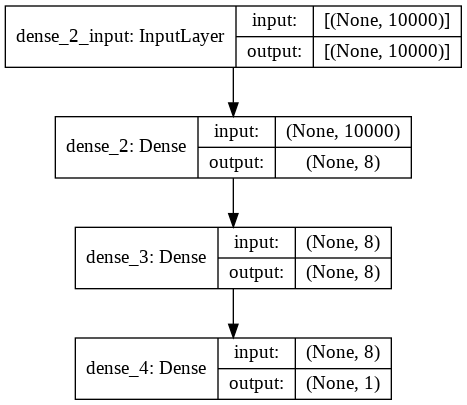

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

## Model Compiling

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Model Fitting

In [ ]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.4, stratify=train_target, random_state=1234
)

print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)
print(test_input.shape, test_target.shape)

(15000, 10000) (15000,)
(10000, 10000) (10000,)
(25000, 10000) (25000,)


In [ ]:
history = model.fit(
    train_input,
    train_target,
    epochs=20,
    batch_size=512,
    validation_data=(val_input, val_target)
)

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5168 - accuracy: 0.7878 - val_loss: 0.3984 - val_accuracy: 0.8638
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3266 - accuracy: 0.8987 - val_loss: 0.3149 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2442 - accuracy: 0.9243 - val_loss: 0.2860 - val_accuracy: 0.8869
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1946 - accuracy: 0.9387 - val_loss: 0.2750 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1605 - accuracy: 0.9505 - val_loss: 0.2770 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1343 - accuracy: 0.9596 - val_loss: 0.2786 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1133 - accuracy: 0.9681 - val_loss: 0.2882 - val_accuracy: 0.8883
Epoch 8/20
30

## Training Result Visualization

In [ ]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.516794,0.787800,0.398432,0.8638
1,0.326622,0.898733,0.314890,0.8829
2,0.244175,0.924333,0.286043,0.8869
3,0.194572,0.938667,0.274986,0.8892
4,0.160460,0.950533,0.277046,0.8889
5,0.134329,0.959600,0.278632,0.8881
6,0.113349,0.968067,0.288228,0.8883
7,0.096217,0.973000,0.328399,0.8784
8,0.082081,0.979133,0.320477,0.8844
9,0.069474,0.982533,0.337475,0.8823


LOSS

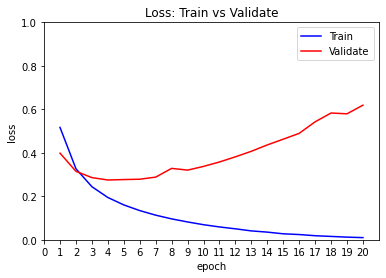

''

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = history_df['loss']
val_loss = history_df['val_loss']
epoch_list = range(1, len(train_loss) + 1, 1)

plt.plot(epoch_list, train_loss, 'blue', label='Train')
plt.plot(epoch_list, val_loss, 'red', label='Validate')

plt.title('Loss: Train vs Validate')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.xlim(0, len(epoch_list) + 1)
plt.xticks(np.arange(len(epoch_list) + 1))
plt.ylim(0, 1)

plt.legend()
plt.show()
;

ACCURACY

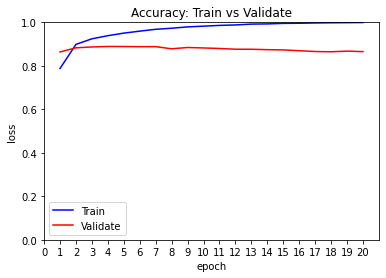

''

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_acc = history_df['accuracy']
val_acc = history_df['val_accuracy']
epoch_list = range(1, len(train_acc) + 1, 1)

plt.plot(epoch_list, train_acc, 'blue', label='Train')
plt.plot(epoch_list, val_acc, 'red', label='Validate')

plt.title('Accuracy: Train vs Validate')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.xlim(0, len(epoch_list) + 1)
plt.xticks(np.arange(len(epoch_list) + 1))
plt.ylim(0, 1)

plt.legend()
plt.show()
;

8번째 쯤 이후로, Overfitting!

## Retraining and Applying to Test Set

In [ ]:
model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(10000, )))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 80008     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_input,
    train_target,
    epochs=8,
    batch_size=512,
    validation_data=(val_input, val_target)
)

Epoch 1/8
30/30 [==============================] - 1s 29ms/step - loss: 0.5410 - accuracy: 0.7797 - val_loss: 0.4217 - val_accuracy: 0.8642
Epoch 2/8
30/30 [==============================] - 1s 19ms/step - loss: 0.3499 - accuracy: 0.8992 - val_loss: 0.3310 - val_accuracy: 0.8826
Epoch 3/8
30/30 [==============================] - 1s 19ms/step - loss: 0.2627 - accuracy: 0.9201 - val_loss: 0.2912 - val_accuracy: 0.8883
Epoch 4/8
30/30 [==============================] - 1s 19ms/step - loss: 0.2116 - accuracy: 0.9355 - val_loss: 0.2857 - val_accuracy: 0.8850
Epoch 5/8
30/30 [==============================] - 1s 19ms/step - loss: 0.1768 - accuracy: 0.9435 - val_loss: 0.2703 - val_accuracy: 0.8906
Epoch 6/8
30/30 [==============================] - 1s 20ms/step - loss: 0.1505 - accuracy: 0.9531 - val_loss: 0.2739 - val_accuracy: 0.8887
Epoch 7/8
30/30 [==============================] - 1s 19ms/step - loss: 0.1294 - accuracy: 0.9611 - val_loss: 0.2770 - val_accuracy: 0.8882
Epoch 8/8
30/30 [===

In [ ]:
import numpy as np

test_loss, test_acc = model.evaluate(test_input, test_target)
print('Test Loss:', np.round(test_loss, 4))
print('Test Accuracy:', np.round(test_acc, 4))

782/782 [==============================] - 2s 3ms/step - loss: 0.3130 - accuracy: 0.8778
Test Loss: 0.313
Test Accuracy: 0.8778


In [ ]:
model.predict(test_input)

array([[0.18603401],
       [0.99991655],
       [0.98545736],
       ...,
       [0.12666957],
       [0.10552344],
       [0.6192002 ]], dtype=float32)